In [792]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, RFECV, RFE, SelectKBest, f_classif
from scipy.stats import randint
from sklearn.model_selection import StratifiedKFold, KFold

In [793]:

main = pd.read_json('../results_cleaned/mdf_all.json')
main = main.dropna(how='any',axis=0) 
main.info()
mdf = main.iloc[:,2:-1]
mdf
# mdf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 118
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tree_idx      111 non-null    int64  
 1   test_number   111 non-null    object 
 2   Tmin          111 non-null    float64
 3   Tmean         111 non-null    float64
 4   Tmax          111 non-null    float64
 5   Pmin          111 non-null    float64
 6   Pmean         111 non-null    float64
 7   Pmax          111 non-null    float64
 8   RHmin         111 non-null    float64
 9   RHmean        111 non-null    float64
 10  RHmax         111 non-null    float64
 11  cwsi          111 non-null    float64
 12  NDVI median   111 non-null    float64
 13  GNDVI median  111 non-null    float64
 14  OSAVI median  111 non-null    float64
 15  LCI median    111 non-null    float64
 16  NDRE median   111 non-null    float64
 17  SWP           111 non-null    float64
 18  SWPc          111 non-null    

,Tmin,Tmean,Tmax,Pmin,Pmean,Pmax,RHmin,RHmean,RHmax,cwsi,NDVI median,GNDVI median,OSAVI median,LCI median,NDRE median,SWP
0,12.75,23.616700,35.41,1006.89,1009.326300,1011.01,30.30,56.970300,85.53,0.225049,0.680596,0.564822,0.343672,0.238299,0.165678,21.33
1,12.75,23.616700,35.41,1006.89,1009.326300,1011.01,30.30,56.970300,85.53,0.254403,0.709513,0.589902,0.347813,0.241712,0.165408,16.33
2,12.75,23.616700,35.41,1006.89,1009.326300,1011.01,30.30,56.970300,85.53,0.215264,0.696943,0.578733,0.352290,0.224013,0.152534,24.00
3,12.75,23.616700,35.41,1006.89,1009.326300,1011.01,30.30,56.970300,85.53,0.205479,0.713962,0.580458,0.358707,0.222680,0.149966,17.17
4,12.75,23.616700,35.41,1006.89,1009.326300,1011.01,30.30,56.970300,85.53,0.166341,0.692211,0.576588,0.331614,0.233609,0.160824,18.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,16.76,25.054796,36.07,1008.13,1010.833265,1013.10,32.75,63.825918,90.07,0.228963,0.671807,0.567401,0.286633,0.226394,0.156473,19.83
115,16.76,25.054796,36.07,1008.13,1010.833265,1013.10,32.75,63.825918,90.07,0.324853,0.678749,0.569933,0.291628,0.220869,0.152646,25.17
116,16.76,25.054796,36.07,1008.13,1010.833265,1013.10,32.75,63.825918,90.07,0.289628,0.648854,0.533746,0.297958,0.182921,0.125482,19.50
117,16.76,25.054796,36.07,1008.13,1010.833265,1013.10,32.75,63.825918,90.07,0.385519,0.575638,0.489463,0.223720,0.153978,0.109748,18.00


In [794]:
corrs = mdf.corr()
# print(corrs)
print(corrs['SWP'].sort_values(ascending=False),'\n')

SWP             1.000000
Tmax            0.551078
cwsi            0.430160
Tmean           0.377093
NDRE median     0.177583
LCI median      0.149763
GNDVI median    0.082618
NDVI median     0.054667
Tmin            0.031959
OSAVI median    0.011253
Pmax           -0.070643
Pmean          -0.223609
RHmax          -0.260923
Pmin           -0.364867
RHmin          -0.517084
RHmean         -0.523477
Name: SWP, dtype: float64 



<AxesSubplot:>

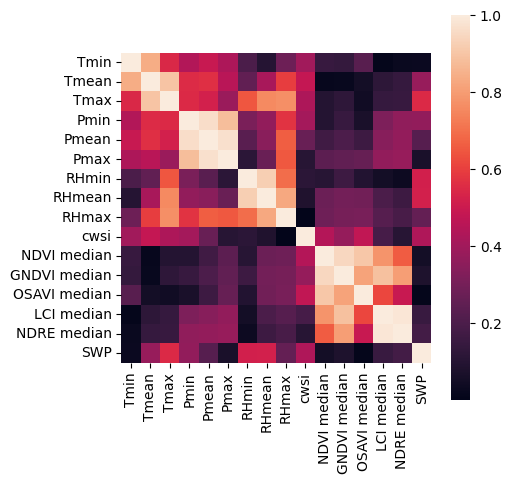

In [795]:
f , ax = plt.subplots(figsize=(5,5))

sns.heatmap(abs(corrs),square=True,vmax=1)

<AxesSubplot:>

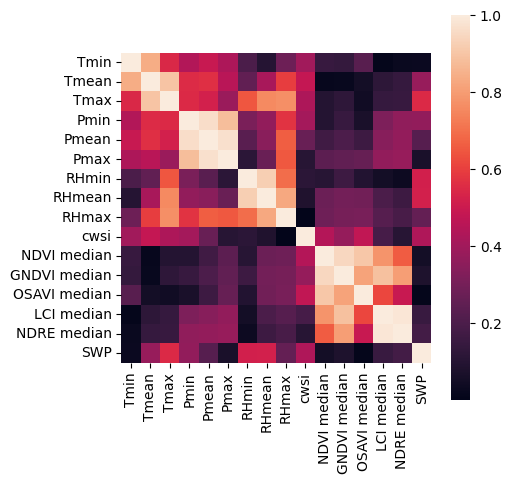

In [796]:
# # mdf = mdf.drop(['LCI median','NDVI median','GNDVI median', 'leaf_temp','OSAVI median'], axis=1)
# mdf = mdf.drop(['LCI median', 'OSAVI median' , 'GNDVI median' ,'NDVI median' ,'Pmax','Pmin','RHmin','RHmax','Tmin','Tmean'], axis=1)
corrs = mdf.corr()
f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(abs(corrs),square=True,vmax=1)

In [797]:
bins = (0,18,40)
label_quality = LabelEncoder()
# group_names = ['WL1','WL2']
main['SWPc2'] = pd.cut(main['SWP'], bins=bins)
main['SWPc2'] = label_quality.fit_transform(main['SWPc2'])
main['SWPc2'].isnull().sum()

0

In [798]:
mdf

,Tmin,Tmean,Tmax,Pmin,Pmean,Pmax,RHmin,RHmean,RHmax,cwsi,NDVI median,GNDVI median,OSAVI median,LCI median,NDRE median,SWP
0,12.75,23.616700,35.41,1006.89,1009.326300,1011.01,30.30,56.970300,85.53,0.225049,0.680596,0.564822,0.343672,0.238299,0.165678,21.33
1,12.75,23.616700,35.41,1006.89,1009.326300,1011.01,30.30,56.970300,85.53,0.254403,0.709513,0.589902,0.347813,0.241712,0.165408,16.33
2,12.75,23.616700,35.41,1006.89,1009.326300,1011.01,30.30,56.970300,85.53,0.215264,0.696943,0.578733,0.352290,0.224013,0.152534,24.00
3,12.75,23.616700,35.41,1006.89,1009.326300,1011.01,30.30,56.970300,85.53,0.205479,0.713962,0.580458,0.358707,0.222680,0.149966,17.17
4,12.75,23.616700,35.41,1006.89,1009.326300,1011.01,30.30,56.970300,85.53,0.166341,0.692211,0.576588,0.331614,0.233609,0.160824,18.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,16.76,25.054796,36.07,1008.13,1010.833265,1013.10,32.75,63.825918,90.07,0.228963,0.671807,0.567401,0.286633,0.226394,0.156473,19.83
115,16.76,25.054796,36.07,1008.13,1010.833265,1013.10,32.75,63.825918,90.07,0.324853,0.678749,0.569933,0.291628,0.220869,0.152646,25.17
116,16.76,25.054796,36.07,1008.13,1010.833265,1013.10,32.75,63.825918,90.07,0.289628,0.648854,0.533746,0.297958,0.182921,0.125482,19.50
117,16.76,25.054796,36.07,1008.13,1010.833265,1013.10,32.75,63.825918,90.07,0.385519,0.575638,0.489463,0.223720,0.153978,0.109748,18.00



 SWPc2 
 1    82
0    29
Name: SWPc2, dtype: int64


(0.0, 100.0)

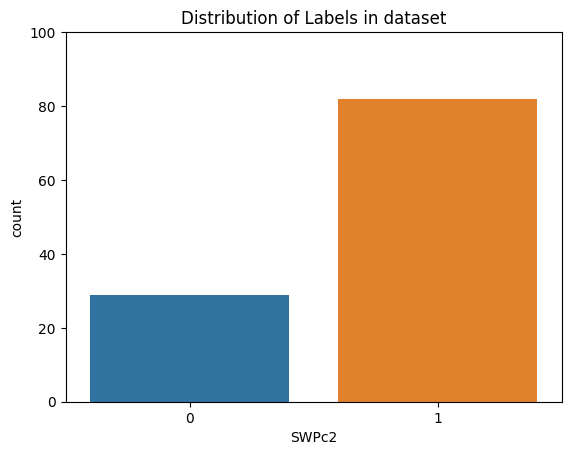

In [799]:
print('\n SWPc2 \n',main['SWPc2'].value_counts())
sns.countplot(x=main['SWPc2'])
plt.title("Distribution of Labels in dataset")
plt.ylim(None,100)

Dataset split


 Test data set 
 1    32
0    13
Name: SWPc2, dtype: int64


(0.0, 100.0)

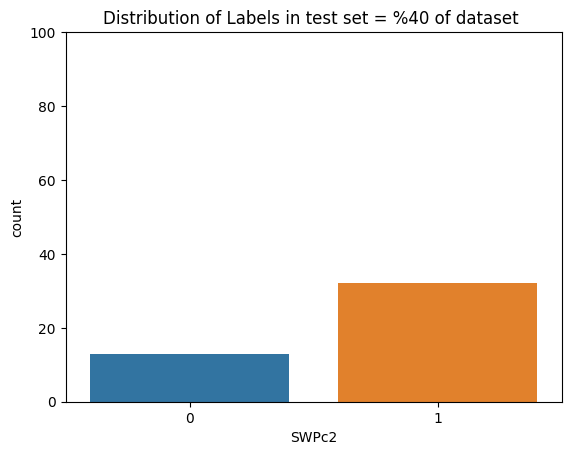

In [800]:
X = mdf.drop('SWP',axis=1)
y = main['SWPc2']
test_size = 0.4
num_features_to_select = 4
cv=10
skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, \
                                                    random_state = 42)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

feature_names = mdf.columns[:-1].to_numpy() 


print('\n Test data set \n',y_test.value_counts())
sns.countplot(x=y_test)
plt.title("Distribution of Labels in test set = %{} of dataset ".format(int(test_size*100)))
plt.ylim(None,100)

In [801]:
# pca = PCA(n_components=5) 
# X = pca.fit(X).transform(X)
np.size(X_train)

990

-Random Forest

In [802]:
############ Hyperparameter optimization RandomizedCV and RFECV  ############
rf_param_grid = {
    'clf__n_estimators': randint(10, 500),
    'clf__max_features': ['sqrt', 'log2'],
    'clf__max_depth': randint(1, 5),
    'clf__criterion': ['gini', 'entropy']
}

pipe_rfc = Pipeline([
    ('scaler', StandardScaler()),
    # ('selector', RFECV(estimator=RandomForestClassifier(), step=1, cv=5)),
    ('selector', RFE(estimator=RandomForestClassifier(), n_features_to_select=num_features_to_select)),
    ('clf', RandomForestClassifier())
])

# Initialize RandomizedSearchCV
grid_search_rfc = RandomizedSearchCV(estimator=pipe_rfc, param_distributions=rf_param_grid, cv=skf, n_jobs=-1, verbose=2)

# Fit to the data
grid_search_rfc.fit(X_train, y_train)

# Extract best estimator
best_rfc = grid_search_rfc.best_estimator_

# Predict using best estimator
pred_rfc = best_rfc.predict(X_test)
# Get the best features

print("Current available features: ",feature_names)
rf_support = best_rfc.named_steps['selector'].support_
rf_feature = feature_names[rf_support]
print("Best features for RandomForest: ", rf_feature)

# Get feature importances
importances = best_rfc.named_steps['clf'].feature_importances_

# Get indices of features sorted by their importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking for selected features
print("Feature ranking for selected features:")

for f in range(sum(rf_support)):
    print("%d. feature %s (%f)" % (f + 1, rf_feature[indices[f]], importances[indices[f]]))
print("\n Best Parameters for RF:",grid_search_rfc.best_params_)


rfc = best_rfc
print('\n Random Forest accuracy: ',accuracy_score(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))



Fitting 10 folds for each of 10 candidates, totalling 100 fits
Current available features:  ['Tmin' 'Tmean' 'Tmax' 'Pmin' 'Pmean' 'Pmax' 'RHmin' 'RHmean' 'RHmax'
 'cwsi' 'NDVI median' 'GNDVI median' 'OSAVI median' 'LCI median'
 'NDRE median']
Best features for RandomForest:  ['Tmax' 'RHmean' 'cwsi' 'NDVI median']
Feature ranking for selected features:
1. feature Tmax (0.408945)
2. feature RHmean (0.386321)
3. feature cwsi (0.147696)
4. feature NDVI median (0.057039)

 Best Parameters for RF: {'clf__criterion': 'gini', 'clf__max_depth': 2, 'clf__max_features': 'sqrt', 'clf__n_estimators': 439}

 Random Forest accuracy:  0.8888888888888888
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.86      1.00      0.93        32

    accuracy                           0.89        45
   macro avg       0.93      0.81      0.84        45
weighted avg       0.90      0.89      0.88        45

[[ 8  5]
 [ 0 32]]


Support Vector Machine

In [803]:
# Setup the pipeline steps
pipe_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=num_features_to_select)),  
    ('svc', SVC())
])

# Define a grid of hyperparameters
svc_param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Initialize GridSearchCV
grid_search_svc = GridSearchCV(estimator=pipe_svc, param_grid=svc_param_grid, cv=skf, n_jobs=-1, verbose=2)

# Fit to the data
grid_search_svc.fit(X_train, y_train)

# Extract the best estimator
best_svc = grid_search_svc.best_estimator_

# Predict using the best estimator
pred_svc = best_svc.predict(X_test)

print("Current available features: ", feature_names)
svc_support = best_svc.named_steps['selector'].get_support()
svc_feature = feature_names[svc_support]
print("Selected features for SVC: ", svc_feature)

svc = best_svc
print('\n Best Parameters for SVC:',grid_search_svc.best_params_)
print('\n SVM accuracy: ',accuracy_score(y_test, pred_svc))
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))


# svc=SVC()
# svc.fit(X_train,y_train)
# pred_svc = svc.predict(X_test)
# print('SVM accuracy: ',accuracy_score(y_test, pred_svc))
# print(classification_report(y_test, pred_svc))
# print(confusion_matrix(y_test, pred_svc))

Fitting 10 folds for each of 32 candidates, totalling 320 fits
Current available features:  ['Tmin' 'Tmean' 'Tmax' 'Pmin' 'Pmean' 'Pmax' 'RHmin' 'RHmean' 'RHmax'
 'cwsi' 'NDVI median' 'GNDVI median' 'OSAVI median' 'LCI median'
 'NDRE median']
Selected features for SVC:  ['Tmax' 'RHmin' 'RHmean' 'cwsi']

 Best Parameters for SVC: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

 SVM accuracy:  0.8888888888888888
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.86      1.00      0.93        32

    accuracy                           0.89        45
   macro avg       0.93      0.81      0.84        45
weighted avg       0.90      0.89      0.88        45

[[ 8  5]
 [ 0 32]]


Gaussian NB

In [804]:
pipe_gnb = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=num_features_to_select)),  
    ('gnb', GaussianNB())
])

# Fit to the data
pipe_gnb.fit(X_train, y_train)

# Predict using the pipeline
pred_gnb = pipe_gnb.predict(X_test)

print("Current available features: ", feature_names)
gnb_support = pipe_gnb.named_steps['selector'].get_support()
gnb_feature = feature_names[gnb_support]
print("Selected features for GaussianNB: ", gnb_feature)

gnb = pipe_gnb
print('\n GaussianNB accuracy: ',accuracy_score(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))
print(confusion_matrix(y_test, pred_gnb))


# gnb= GaussianNB()
# gnb.fit(X_train,y_train)
# pred_gnb = gnb.predict(X_test)
# print('GaussianNB accuracy: ',accuracy_score(y_test, pred_gnb))
# print(classification_report(y_test, pred_gnb))
# print(confusion_matrix(y_test, pred_gnb))

Current available features:  ['Tmin' 'Tmean' 'Tmax' 'Pmin' 'Pmean' 'Pmax' 'RHmin' 'RHmean' 'RHmax'
 'cwsi' 'NDVI median' 'GNDVI median' 'OSAVI median' 'LCI median'
 'NDRE median']
Selected features for GaussianNB:  ['Tmax' 'RHmin' 'RHmean' 'cwsi']

 GaussianNB accuracy:  0.8
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.90      0.81      0.85        32

    accuracy                           0.80        45
   macro avg       0.76      0.79      0.77        45
weighted avg       0.82      0.80      0.81        45

[[10  3]
 [ 6 26]]


Decision Tree

In [805]:

# Define parameter grid for DecisionTree
dt_param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': randint(1, 5),
    'clf__min_samples_split': randint(2, 10),
    'clf__min_samples_leaf': randint(1, 5)
}

pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=num_features_to_select)),  
    ('clf', tree.DecisionTreeClassifier())
])

# Initialize RandomizedSearchCV
grid_search_dt = RandomizedSearchCV(estimator=pipe_dt, param_distributions=dt_param_grid, cv=skf, n_jobs=-1, verbose=2)

# Fit to the data
grid_search_dt.fit(X_train, y_train)

# Extract the best estimator
best_dt = grid_search_dt.best_estimator_

# Predict using the best estimator
pred_dt = best_dt.predict(X_test)

print("Current available features: ", feature_names)
dt_support = best_dt.named_steps['selector'].get_support()
dt_feature = feature_names[dt_support]
print("Selected features for DecisionTreeClassifier: ", dt_feature)

dt = best_dt
print("\n Best Parameters for DecisionTree:",grid_search_dt.best_params_)
print('\n Decision Tree accuracy: ',accuracy_score(y_test, pred_dt))
print(classification_report(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))


# dt= tree.DecisionTreeClassifier()
# dt.fit(X_train,y_train)
# pred_dt = dt.predict(X_test)
# print('DT accuracy: ',accuracy_score(y_test, pred_dt))
# print(classification_report(y_test, pred_dt))
# print(confusion_matrix(y_test, pred_dt))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Current available features:  ['Tmin' 'Tmean' 'Tmax' 'Pmin' 'Pmean' 'Pmax' 'RHmin' 'RHmean' 'RHmax'
 'cwsi' 'NDVI median' 'GNDVI median' 'OSAVI median' 'LCI median'
 'NDRE median']
Selected features for DecisionTreeClassifier:  ['Tmax' 'RHmin' 'RHmean' 'cwsi']

 Best Parameters for DecisionTree: {'clf__criterion': 'entropy', 'clf__max_depth': 2, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 9}

 Decision Tree accuracy:  0.8888888888888888
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.86      1.00      0.93        32

    accuracy                           0.89        45
   macro avg       0.93      0.81      0.84        45
weighted avg       0.90      0.89      0.88        45

[[ 8  5]
 [ 0 32]]


K Nearest Neibour

In [806]:
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=num_features_to_select)),  # Univariate feature selection
    ('knn', KNeighborsClassifier())
])

# Define a random grid of hyperparameters
knn_param_grid = {
    'knn__n_neighbors': randint(1, 20),  # Random integer between 1 and 20
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize RandomizedSearchCV
grid_search_knn = RandomizedSearchCV(estimator=pipe_knn, param_distributions=knn_param_grid, cv=skf, n_jobs=-1, verbose=2)

# Fit to the data
grid_search_knn.fit(X_train, y_train)

# Extract the best estimator
best_knn = grid_search_knn.best_estimator_

# Predict using the best estimator
pred_knn = best_knn.predict(X_test)

print("Current available features: ", feature_names)
knn_support = best_knn.named_steps['selector'].get_support()
knn_feature = feature_names[knn_support]
print("Selected features for KNeighborsClassifier: ", knn_feature)

knn = best_knn
print("\nBest Parameters for KNN:", grid_search_knn.best_params_)
print('\n KNN accuracy: ', accuracy_score(y_test, pred_knn))
print(classification_report(y_test, pred_knn))
print(confusion_matrix(y_test, pred_knn))

# knn= KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train,y_train)
# pred_knn = knn.predict(X_test)
# print('KNN accuracy: ',accuracy_score(y_test, pred_knn))
# print(classification_report(y_test, pred_knn))
# print(confusion_matrix(y_test, pred_knn))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Current available features:  ['Tmin' 'Tmean' 'Tmax' 'Pmin' 'Pmean' 'Pmax' 'RHmin' 'RHmean' 'RHmax'
 'cwsi' 'NDVI median' 'GNDVI median' 'OSAVI median' 'LCI median'
 'NDRE median']
Selected features for KNeighborsClassifier:  ['Tmax' 'RHmin' 'RHmean' 'cwsi']

Best Parameters for KNN: {'knn__metric': 'manhattan', 'knn__n_neighbors': 16, 'knn__weights': 'uniform'}

 KNN accuracy:  0.8888888888888888
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.86      1.00      0.93        32

    accuracy                           0.89        45
   macro avg       0.93      0.81      0.84        45
weighted avg       0.90      0.89      0.88        45

[[ 8  5]
 [ 0 32]]


Artificial Neural Network

In [807]:
# Setup the pipeline steps
pipe_mlpc = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=num_features_to_select)),  # Univariate feature selection
    ('mlp', MLPClassifier(max_iter=2000))
])

# Define a random grid of hyperparameters
mlp_param_grid = {
    'mlp__hidden_layer_sizes': [(randint.rvs(5, 20), randint.rvs(5, 20)) for _ in range(10)],  # 10 random combinations
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.0001, 0.05],
    'mlp__learning_rate': ['constant', 'adaptive'],
}

# Initialize RandomizedSearchCV
grid_search_mlp = RandomizedSearchCV(estimator=pipe_mlpc, param_distributions=mlp_param_grid, cv=skf, n_jobs=-1, verbose=2)

# Fit to the data
grid_search_mlp.fit(X_train, y_train)

# Extract the best estimator
best_mlp = grid_search_mlp.best_estimator_

# Predict using the best estimator
pred_mlp = best_mlp.predict(X_test)


print("Current available features: ", feature_names)
mlp_support = best_mlp.named_steps['selector'].get_support()
mlp_feature = feature_names[mlp_support]
print("Selected features for MLPClassifier: ", mlp_feature)

mlpc = best_mlp
print("\n Best Parameters for MLP:",grid_search_mlp.best_params_)
print('\n Neural Network accuracy: ',accuracy_score(y_test, pred_mlp))
print(classification_report(y_test, pred_mlp))
print(confusion_matrix(y_test, pred_mlp))

# mlpc= MLPClassifier(hidden_layer_sizes=(15,15),max_iter=2000)
# mlpc.fit(X_train,y_train)
# pred_mlpc = mlpc.predict(X_test)
# print('Neural Network accuracy: ',accuracy_score(y_test, pred_mlpc))
# print(classification_report(y_test, pred_mlpc))
# print(confusion_matrix(y_test, pred_mlpc))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Current available features:  ['Tmin' 'Tmean' 'Tmax' 'Pmin' 'Pmean' 'Pmax' 'RHmin' 'RHmean' 'RHmax'
 'cwsi' 'NDVI median' 'GNDVI median' 'OSAVI median' 'LCI median'
 'NDRE median']
Selected features for MLPClassifier:  ['Tmax' 'RHmin' 'RHmean' 'cwsi']

 Best Parameters for MLP: {'mlp__solver': 'sgd', 'mlp__learning_rate': 'adaptive', 'mlp__hidden_layer_sizes': (19, 12), 'mlp__alpha': 0.05, 'mlp__activation': 'tanh'}

 Neural Network accuracy:  0.8
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.85      0.88      0.86        32

    accuracy                           0.80        45
   macro avg       0.76      0.75      0.75        45
weighted avg       0.80      0.80      0.80        45

[[ 8  5]
 [ 4 28]]


Cross Validation

In [808]:
cval_rf = np.array(cross_val_score(rfc, X, y, cv=skf))
cval_svc = np.array(cross_val_score(svc, X, y, cv=skf))
cval_gnb = np.array(cross_val_score(gnb, X, y, cv=skf))
cval_dt = np.array(cross_val_score(dt, X, y, cv=skf))
cval_knn = np.array(cross_val_score(knn, X, y, cv=skf))
cval_nn = np.array(cross_val_score(mlpc, X, y, cv=skf))

In [809]:
model_stats = pd.DataFrame({
    'Model': ['RandomF', 'SVM', 'GaussianNB', 'DT', 'KNN', 'NN'],
    'CV Mean': [cval_rf.mean(), cval_svc.mean(), cval_gnb.mean(), cval_dt.mean(), cval_knn.mean(), cval_nn.mean()],
    'CV Std': [cval_rf.std(), cval_svc.std(), cval_gnb.std(), cval_dt.std(), cval_knn.std(), cval_nn.std()]
})

model_stats.set_index('Model', inplace=True)
model_stats = model_stats.round(2)
model_stats

,CV Mean,CV Std
Model,,
RandomF,0.89,0.05
SVM,0.89,0.05
GaussianNB,0.82,0.11
DT,0.89,0.05
KNN,0.89,0.05
NN,0.89,0.05


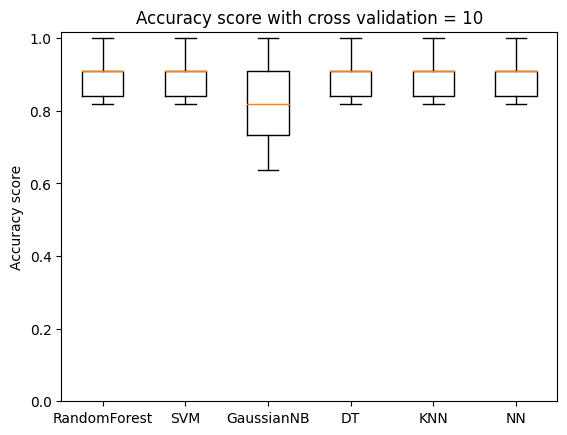

In [810]:
data = [cval_rf,cval_svc,cval_gnb,cval_dt,cval_knn,cval_nn]
plt.boxplot(data)
plt.xticks([1, 2, 3, 4, 5, 6],['RandomForest','SVM','GaussianNB','DT','KNN','NN'])
plt.ylabel('Accuracy score')
plt.title('Accuracy score with cross validation = ' + str(cv))
plt.ylim(bottom=0)
plt.show()

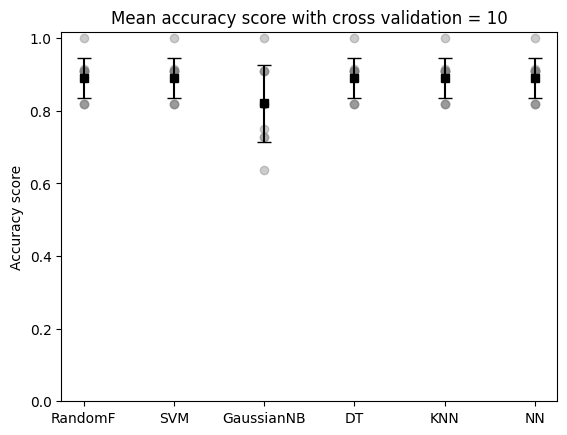

In [811]:
# Prepare the data
models = ['RandomF', 'SVM', 'GaussianNB', 'DT', 'KNN', 'NN']
means = [cval_rf.mean(), cval_svc.mean(), cval_gnb.mean(), cval_dt.mean(), cval_knn.mean(), cval_nn.mean()]
stds = [cval_rf.std(), cval_svc.std(), cval_gnb.std(), cval_dt.std(), cval_knn.std(), cval_nn.std()]
all_values = [cval_rf, cval_svc, cval_gnb, cval_dt, cval_knn, cval_nn]

# Create index for each model
index = np.arange(len(models))

# Create scatter plot for individual scores
for i, values in enumerate(all_values):
    plt.scatter([i]*len(values), values, alpha=0.4, color='gray')

# Create scatter plot for mean scores with error bars
plt.errorbar(index, means, yerr=stds, fmt='s', color='k', capsize=5)

# Label the x-axis with model names
plt.xticks(index, models)

plt.ylabel('Accuracy score')
plt.title('Mean accuracy score with cross validation = ' + str(cv))
plt.ylim(bottom=0)
plt.show()